### BL.EN.U4AIE21113
### ASP-Lab8

In [1]:
import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Dropout
import matplotlib.pyplot as plt

### Question 1.

#### A1. Use LSTM, Bi-LSTM networks for speech recognition. Use STFT / STCT, MFCC & LPC coefficients.

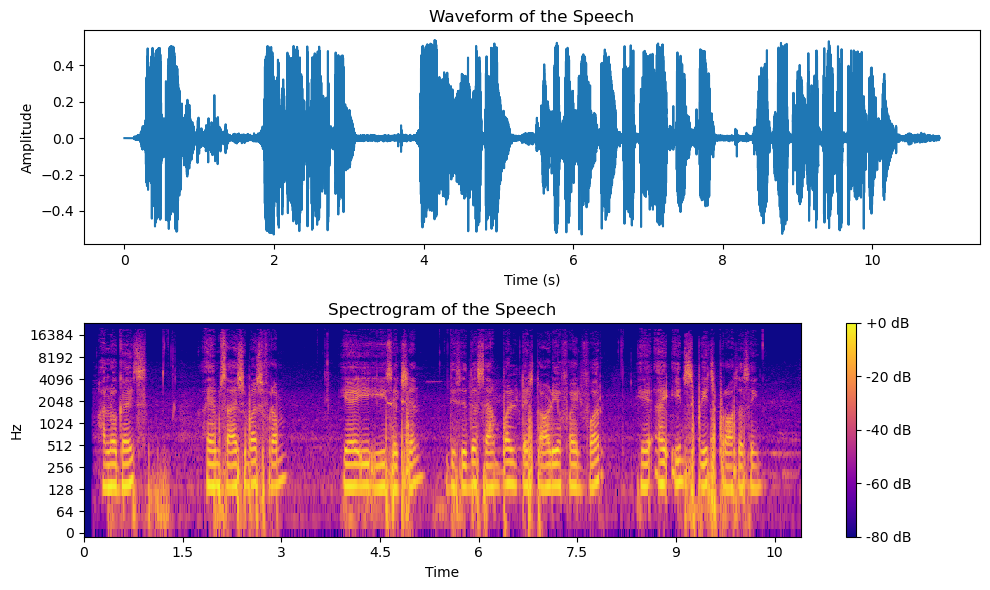

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_30 (Bidirect  (None, 13, 256)           133120    
 ional)                                                          
                                                                 
 time_distributed_30 (TimeD  (None, 13, 64)            16448     
 istributed)                                                     
                                                                 
 dropout_15 (Dropout)        (None, 13, 64)            0         
                                                                 
 bidirectional_31 (Bidirect  (None, 13, 128)           66048     
 ional)                                                          
                                                                 
 time_distributed_31 (TimeD  (None, 13, 10)            1290      
 istributed)                                         

In [18]:
def prepare_data(audio_file_path):
    # Load the audio signal
    y, sr = librosa.load(audio_file_path, sr=None)

    # Short-Time Fourier Transform (STFT)
    D = np.abs(librosa.stft(y))

    # Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Prepare input data for the LSTM model
    X = mfccs.T  # Transpose the MFCC matrix
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Add channel dimension

    return X

def build_lstm_model(input_shape, num_outputs):
    model = Sequential([
        Bidirectional(LSTM(units=128, return_sequences=True), input_shape=input_shape),
        TimeDistributed(Dense(units=64, activation='relu')),
        Dropout(0.2),
        Bidirectional(LSTM(units=64, return_sequences=True)),
        TimeDistributed(Dense(units=num_outputs, activation='softmax'))
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def plot_audio_signals(audio_file_path):
    # Load the audio signal
    y, sr = librosa.load(audio_file_path, sr=None)

    # Plot the waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title('Waveform of the Speech')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    D = np.abs(librosa.stft(y))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log', cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of the Speech')

    plt.tight_layout()
    plt.show()

# Define the audio file path
audio_file_path = "Lab8_Speech.wav"

# Plot the audio signals
plot_audio_signals(audio_file_path)

# Prepare data for LSTM model
X_data = prepare_data(audio_file_path)

# Define the number of output classes (replace with actual number)
num_output_classes = 10

# Build LSTM model
model = build_lstm_model(input_shape=X_data.shape[1:], num_outputs=num_output_classes)

# Display model summary
model.summary()


### Question2. 

#### A2. Speak the sentence “Bhanumathi weds Rajat” (भानुमति वेड्स रजि || భానుమతి వెడ్స్ రజత్). 

Construct speech for the word “Bharat” (భారత్ || भारत  || ಭರತ್ || பாரத்) by combining segmented phonemes taken from “Bhanumathi weds Rajat” speech recording. Listen to this word speech generated a nd note down the issues associated with this approach of speech synthesis.  he string written Indian scripts may have some error. Please validate before using

In [23]:
import os
import tempfile
import speech_recognition as sr
import pyttsx3
import matplotlib.pyplot as plt
import numpy as np
import librosa

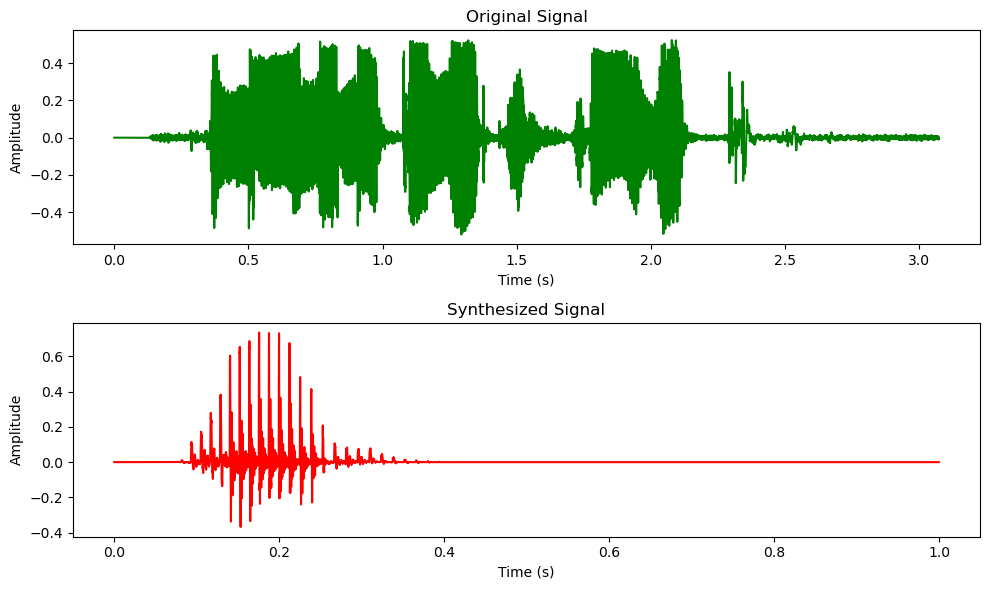

In [26]:


# Get a temporary directory where you have write permissions
custom_temp_dir =  r"C:\Users\SaiSu\Documents\amrita\6th sem\21AIE315 - AI in Speech Processing\Lab8"

# Function to identify target word in transcription and extract its phonemes
def extract_phonemes_from_transcription(transcript, target):
    words = transcript.split()
    for word in words:
        if word.lower() == target.lower():
            return word

# Function to synthesize speech for a word using extracted phonemes
def synthesize_speech(phonemes, output_path):
    engine = pyttsx3.init()
    engine.save_to_file(phonemes, output_path)
    engine.runAndWait()

# Transcribe the input audio file
input_audio_file = "Bhanumati weds Rajat.wav"
recognizer = sr.Recognizer()
with sr.AudioFile(input_audio_file) as source:
    audio_data = recognizer.record(source)
transcript = recognizer.recognize_google(audio_data)

# Extract phonemes for the word "Bharat"
phonemes = extract_phonemes_from_transcription(transcript, "Bharat")

# Synthesize speech for the word "Bharat"
output_audio_file = os.path.join(custom_temp_dir, "Bharat.wav")
synthesize_speech(phonemes, output_audio_file)

# Plot original and synthesized signals
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.title('Original Signal')
audio_data_np, _ = librosa.load(input_audio_file, sr=source.SAMPLE_RATE)
plt.plot(np.linspace(0, len(audio_data_np) / source.SAMPLE_RATE, num=len(audio_data_np)), audio_data_np, color='green')  # Change color to green
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Synthesized signal
synthesized_audio_data, _ = librosa.load(output_audio_file, sr=source.SAMPLE_RATE)
plt.subplot(2, 1, 2)
plt.title('Synthesized Signal')
plt.plot(np.linspace(0, len(synthesized_audio_data) / source.SAMPLE_RATE, num=len(synthesized_audio_data)), synthesized_audio_data, color='red')  # Change color to red
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [20]:
pip install SpeechRecognition


  Obtaining dependency information for SpeechRecognition from https://files.pythonhosted.org/packages/9e/e9/edd24b7000e209f34b5f7d13daa05337a1c306b120c0b92bb24e4527d579/SpeechRecognition-3.10.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/32.8 MB 2.4 MB/s eta 0:00:14
   ---------------------------------------- 0.3/32.8 MB 4.2 MB/s eta 0:00:08
    --------------------------------------- 0.5/32.8 MB 4.1 MB/s eta 0:00:08
    --------------------------------------- 0.8/32.8 MB 4.6 MB/s eta 0:00:07
   - -------------------------------------- 1.0/32.8 MB 4.7 MB/s eta 0:00:07
   - -------------------------------------- 1.2/32.8 MB 4.3 MB/s eta 0:00:08
   - -------------------------------------- 1.4/32.8 MB 4.2 MB/s eta 0:00:08
   - -------------------------------------- 1.4/32.8 MB 4.2 MB/s eta 0:00:08
   - -------------------------------------- 1.5/32.8 MB 3.7 MB/s eta 0:00:09
   - --------

In [22]:
pip install pyttsx3


  Obtaining dependency information for pyttsx3 from https://files.pythonhosted.org/packages/33/9a/de4781245f5ad966646fd276259ef7cfd400ba3cf7d5db7c0d5aab310c20/pyttsx3-2.90-py3-none-any.whl.metadata
  Obtaining dependency information for comtypes from https://files.pythonhosted.org/packages/c3/29/011526bf23a3a0df767565e312adfdf008626132d014579c5d8e1f4162e3/comtypes-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for pypiwin32 from https://files.pythonhosted.org/packages/d0/1b/2f292bbd742e369a100c91faa0483172cd91a1a422a6692055ac920946c5/pypiwin32-223-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/197.7 kB ? eta -:--:--
   ---------- ----------------------------- 51.2/197.7 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 197.7/197.7 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
import IPython.display as ipd 
ipd.display(ipd.Audio(r"C:\Users\SaiSu\Documents\amrita\6th sem\21AIE315 - AI in Speech Processing\Lab8\Bharat.wav"))